In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram as plot_dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
import os

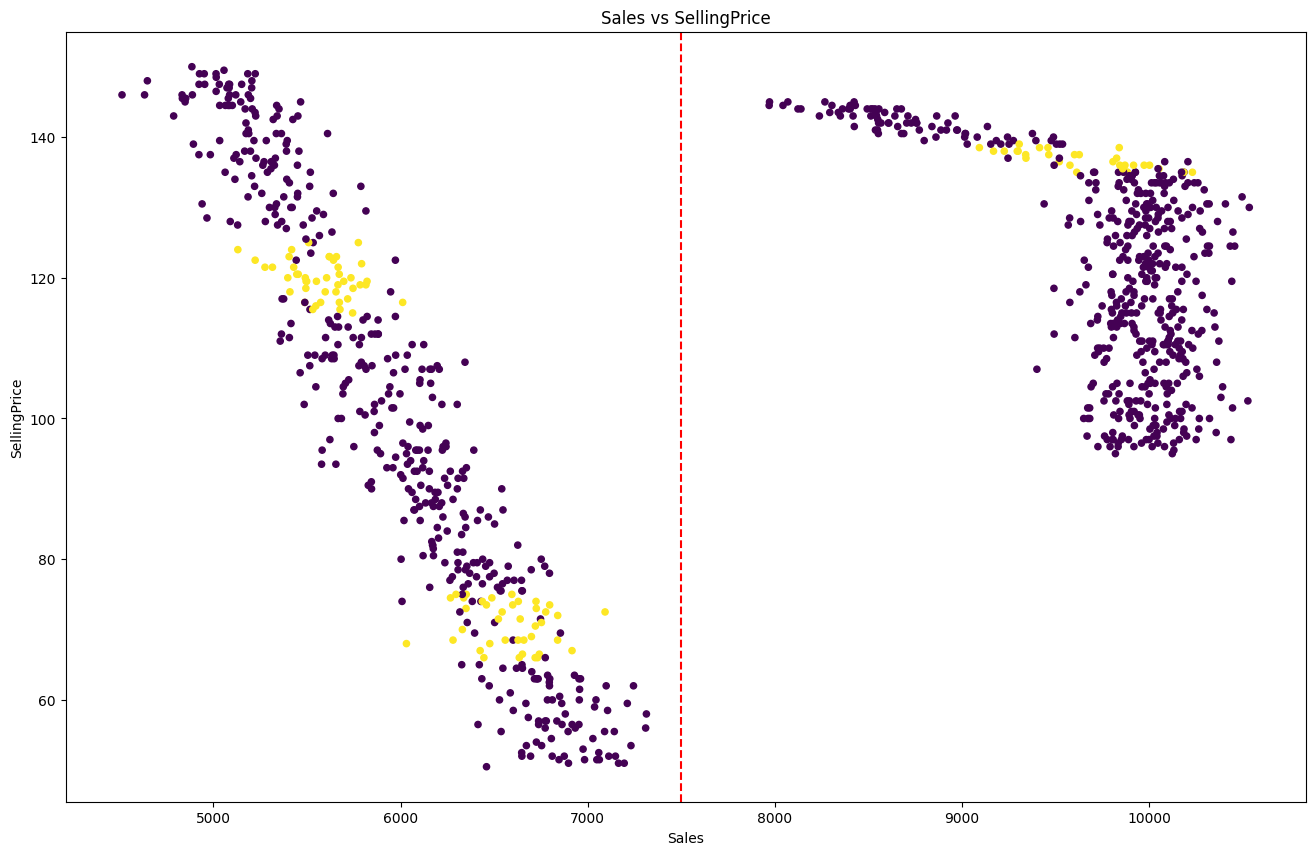

              Sales  SellingPrice     Returned
count   1000.000000   1000.000000  1000.000000
mean    7876.227000    110.565500     0.113000
std     1975.587319     25.600749     0.316751
min     4511.500000     50.500000     0.000000
25%     6017.125000     96.000000     0.000000
50%     7642.000000    114.000000     0.000000
75%     9926.750000    132.000000     0.000000
max    10536.000000    150.000000     1.000000


In [2]:
data = pd.read_csv('fitco.csv')

plt.figure(figsize=(16, 10))
plt.axvline(x=7500, color='r', linestyle='--')
plt.scatter(data['Sales'], data['SellingPrice'], c=data['Returned'], cmap='viridis', s=20)
plt.xlabel('Sales')
plt.ylabel('SellingPrice')
plt.title('Sales vs SellingPrice')
plt.show()

print(data.describe())

In [3]:
# do supervised learning for classification
X = data[['Sales', 'SellingPrice']]
y = data['Returned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

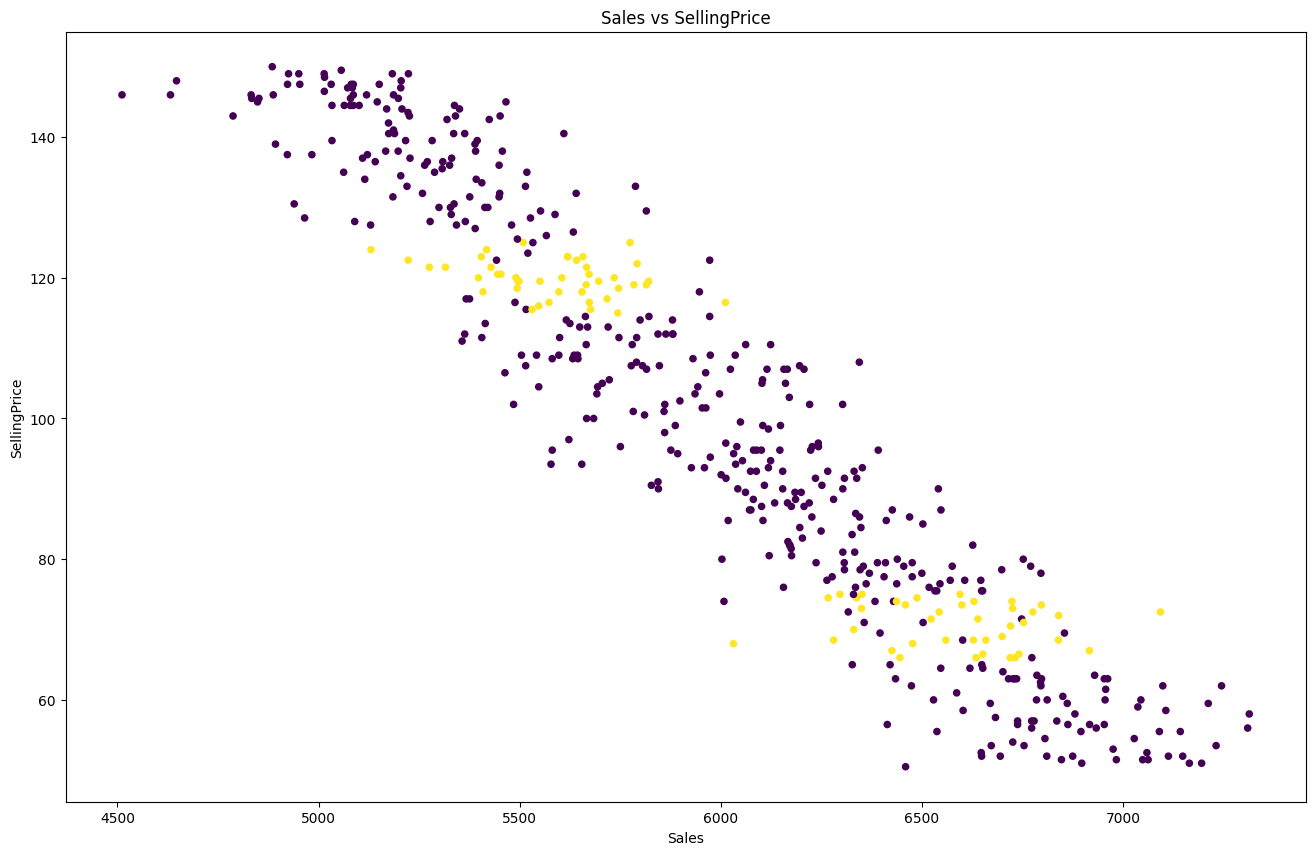

In [4]:
# split data into data_class_a and data_class_b where data_class_a is the data with sales less than 7500
data_class_a = data[data['Sales'] < 7500]
data_class_b = data[data['Sales'] >= 7500]

# plot the data
plt.figure(figsize=(16, 10))
plt.scatter(data_class_a['Sales'], data_class_a['SellingPrice'], c=data_class_a['Returned'], cmap='viridis', s=20)
plt.xlabel('Sales')
plt.ylabel('SellingPrice')
plt.title('Sales vs SellingPrice')
plt.show()


In [5]:
# def draw_decision_boundary(model, X, y, resolution=100, size=10, edgecolor='k'):
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))

#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
#     plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors=edgecolor, cmap='viridis', s=size)  

def draw_decision_boundary(model, X, y, resolution=100, size=10, edgecolor='k'):
    # Extract feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create grid of points to plot
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

    # Plot the training data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor=edgecolor, cmap='viridis', s=size)
    
    # Adding a legend to indicate returned/non-returned classes
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)

In [6]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'SVC Linear': SVC(kernel='linear', probability=True, class_weight='balanced'),
    'SVC RBF': SVC(kernel='rbf', probability=True, class_weight='balanced'), 
    'Random Forest (min_samples_leaf=1)': RandomForestClassifier(class_weight='balanced', min_samples_leaf=1),
    'Random Forest (min_samples_leaf=3)': RandomForestClassifier(class_weight='balanced', min_samples_leaf=3),
    'Random Forest (min_samples_leaf=5)': RandomForestClassifier(class_weight='balanced', min_samples_leaf=5),
    'XGB Classifier': XGBClassifier(scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))),
    'Neural Network (hidden_layer_sizes=(5,))': MLPClassifier(hidden_layer_sizes=(5,)),
    'Neural Network (hidden_layer_sizes=(5,5))': MLPClassifier(hidden_layer_sizes=(5,5)),
    'Neural Network (hidden_layer_sizes=(5,5,5))': MLPClassifier(hidden_layer_sizes=(5,5,5)),
    'Neural Network (hidden_layer_sizes=(10,))': MLPClassifier(hidden_layer_sizes=(10,)),
    'KNN': KNeighborsClassifier(n_neighbors=2),
}

Logistic Regression Accuracy: 0.48, 0.48
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        84
           1       0.15      0.50      0.24        16

    accuracy                           0.48       100
   macro avg       0.49      0.49      0.42       100
weighted avg       0.72      0.48      0.55       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SVC Linear Accuracy: 0.16, 0.16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.loca

SVC RBF Accuracy: 0.42, 0.42
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        84
           1       0.15      0.56      0.24        16

    accuracy                           0.42       100
   macro avg       0.49      0.48      0.38       100
weighted avg       0.72      0.42      0.48       100

Random Forest (min_samples_leaf=1) Accuracy: 0.95, 0.95
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        84
           1       0.82      0.88      0.85        16

    accuracy                           0.95       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.95      0.95      0.95       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest (min_samples_leaf=3) Accuracy: 0.93, 0.93
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        84
           1       0.71      0.94      0.81        16

    accuracy                           0.93       100
   macro avg       0.85      0.93      0.88       100
weighted avg       0.94      0.93      0.93       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest (min_samples_leaf=5) Accuracy: 0.93, 0.93
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        84
           1       0.71      0.94      0.81        16

    accuracy                           0.93       100
   macro avg       0.85      0.93      0.88       100
weighted avg       0.94      0.93      0.93       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


XGB Classifier Accuracy: 0.93, 0.93
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        84
           1       0.74      0.88      0.80        16

    accuracy                           0.93       100
   macro avg       0.86      0.91      0.88       100
weighted avg       0.94      0.93      0.93       100

Neural Network (hidden_layer_sizes=(5,)) Accuracy: 0.84, 0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.loca

Neural Network (hidden_layer_sizes=(5,5)) Accuracy: 0.84, 0.84
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        84
           1       0.00      0.00      0.00        16

    accuracy                           0.84       100
   macro avg       0.42      0.50      0.46       100
weighted avg       0.71      0.84      0.77       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.loca

Neural Network (hidden_layer_sizes=(5,5,5)) Accuracy: 0.16, 0.16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.loca

Neural Network (hidden_layer_sizes=(10,)) Accuracy: 0.16, 0.16
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.16      1.00      0.28        16

    accuracy                           0.16       100
   macro avg       0.08      0.50      0.14       100
weighted avg       0.03      0.16      0.04       100



/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nirav24/.loca

KNN Accuracy: 0.83, 0.83
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        84
           1       0.33      0.06      0.11        16

    accuracy                           0.83       100
   macro avg       0.59      0.52      0.51       100
weighted avg       0.76      0.83      0.78       100



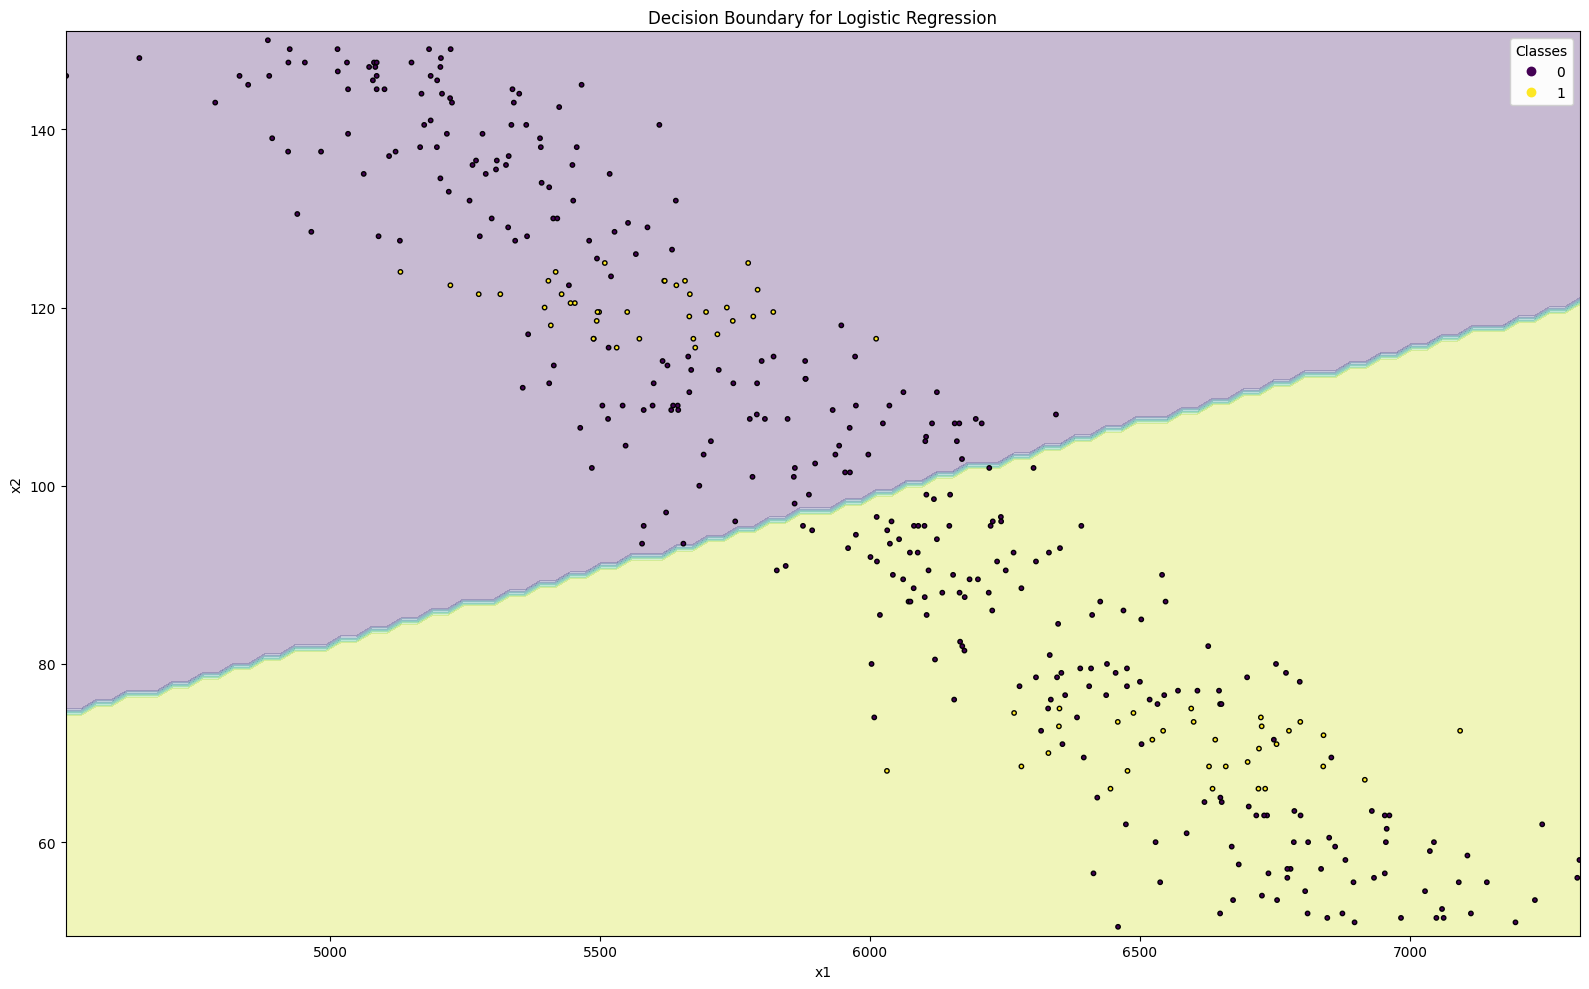

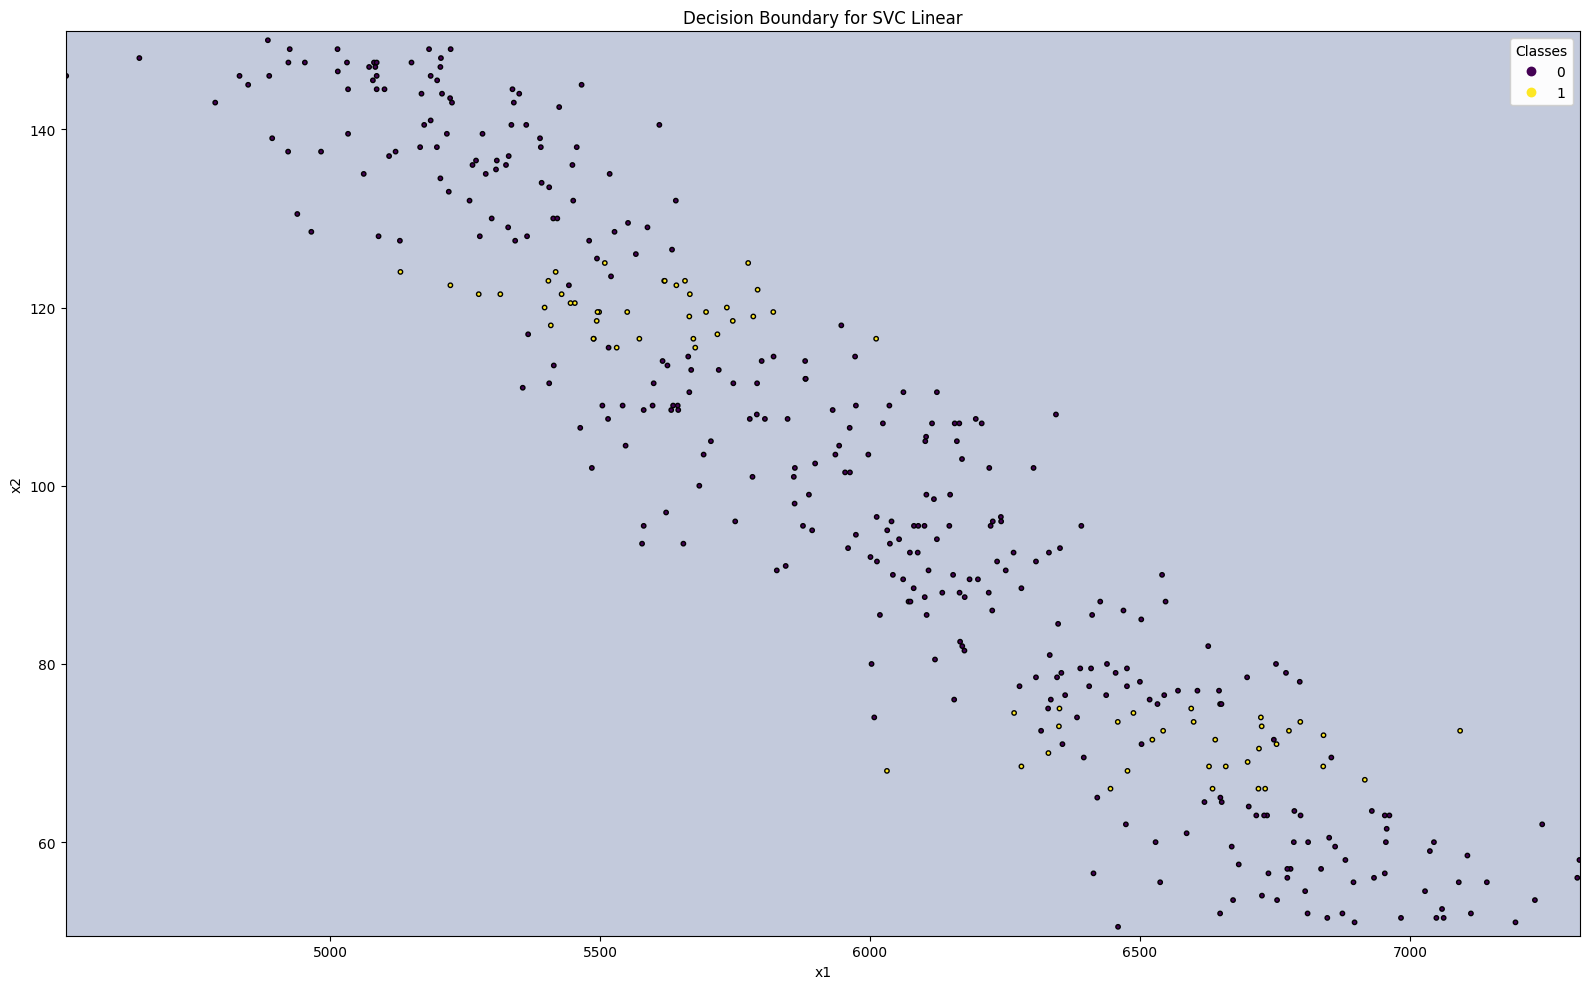

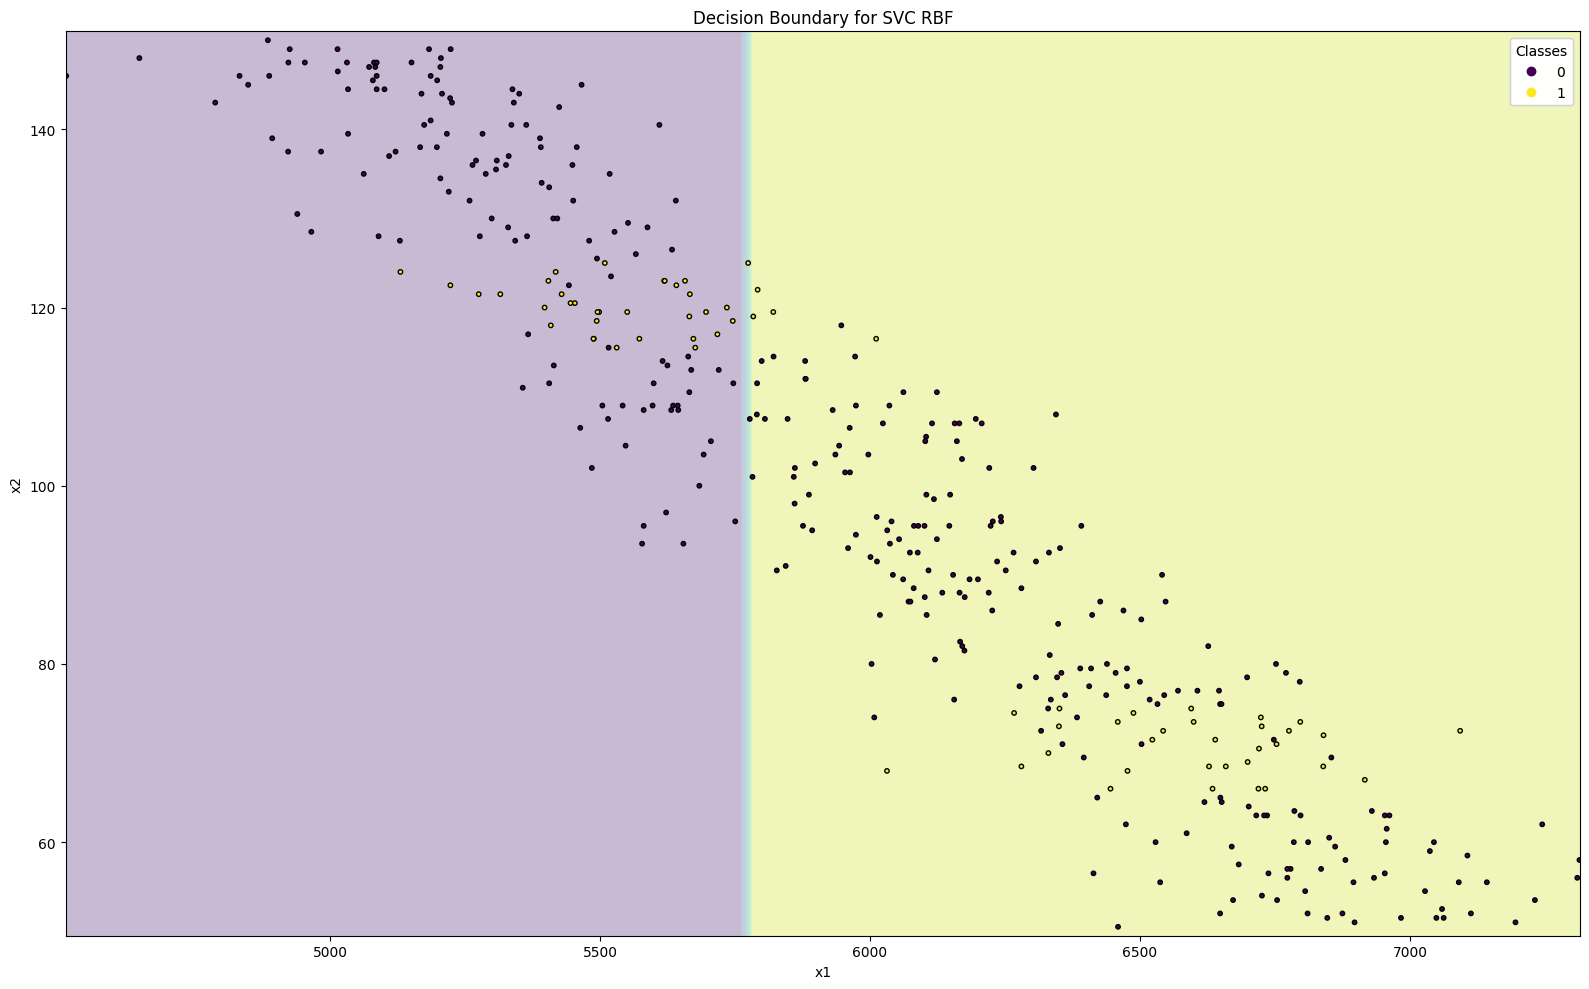

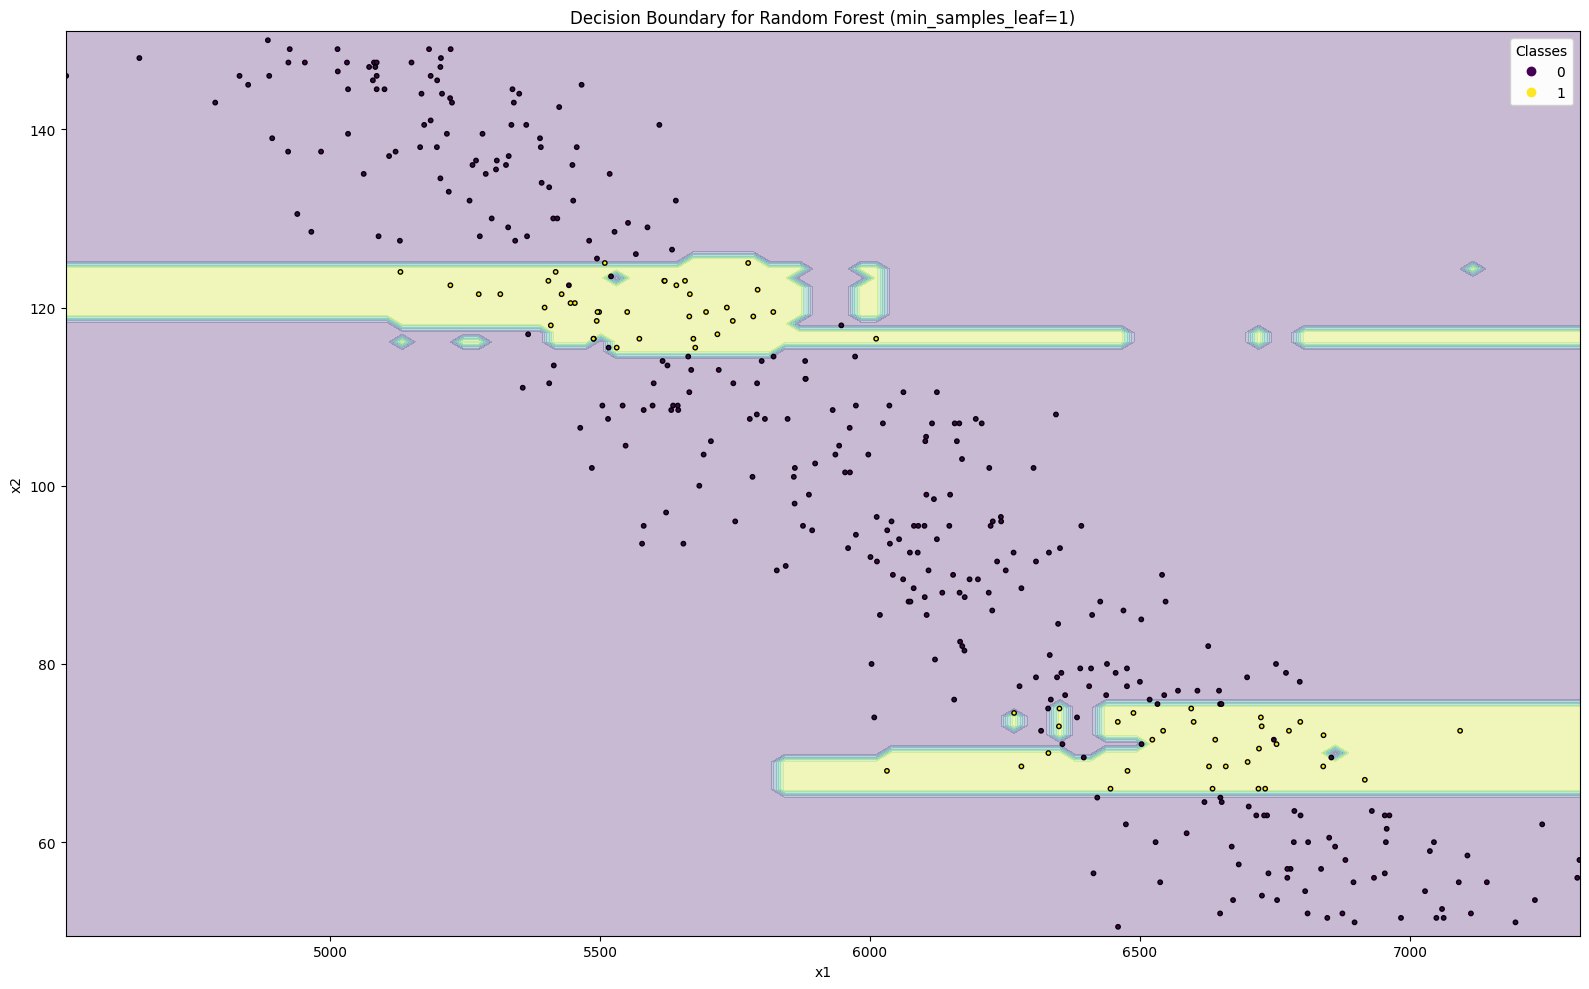

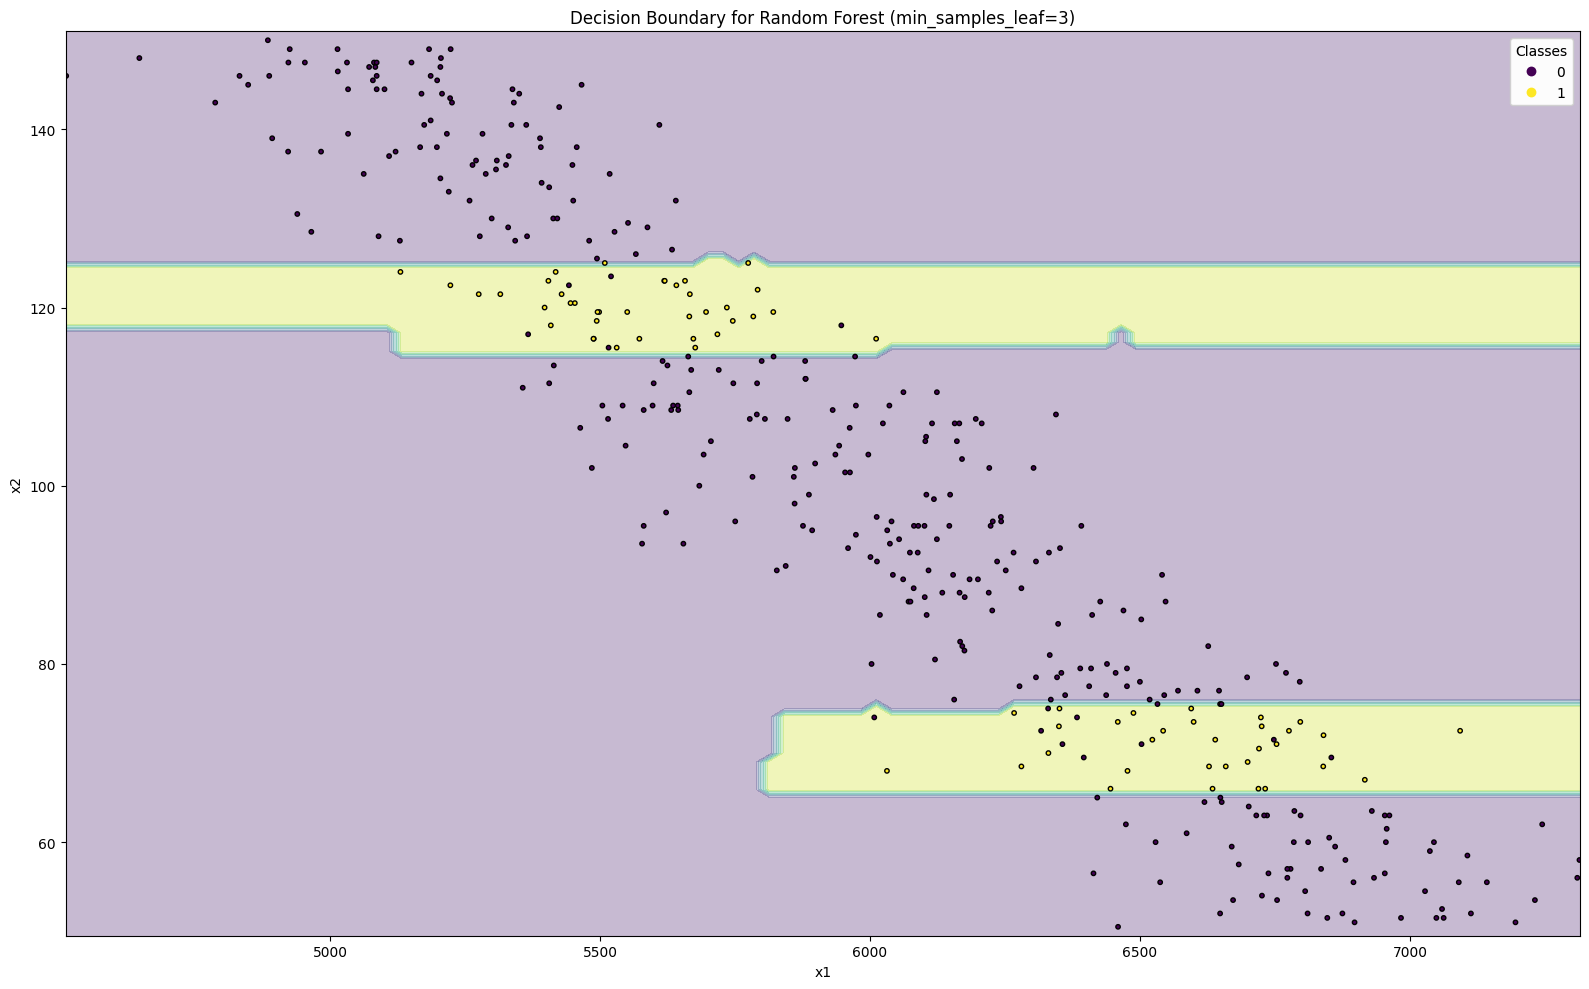

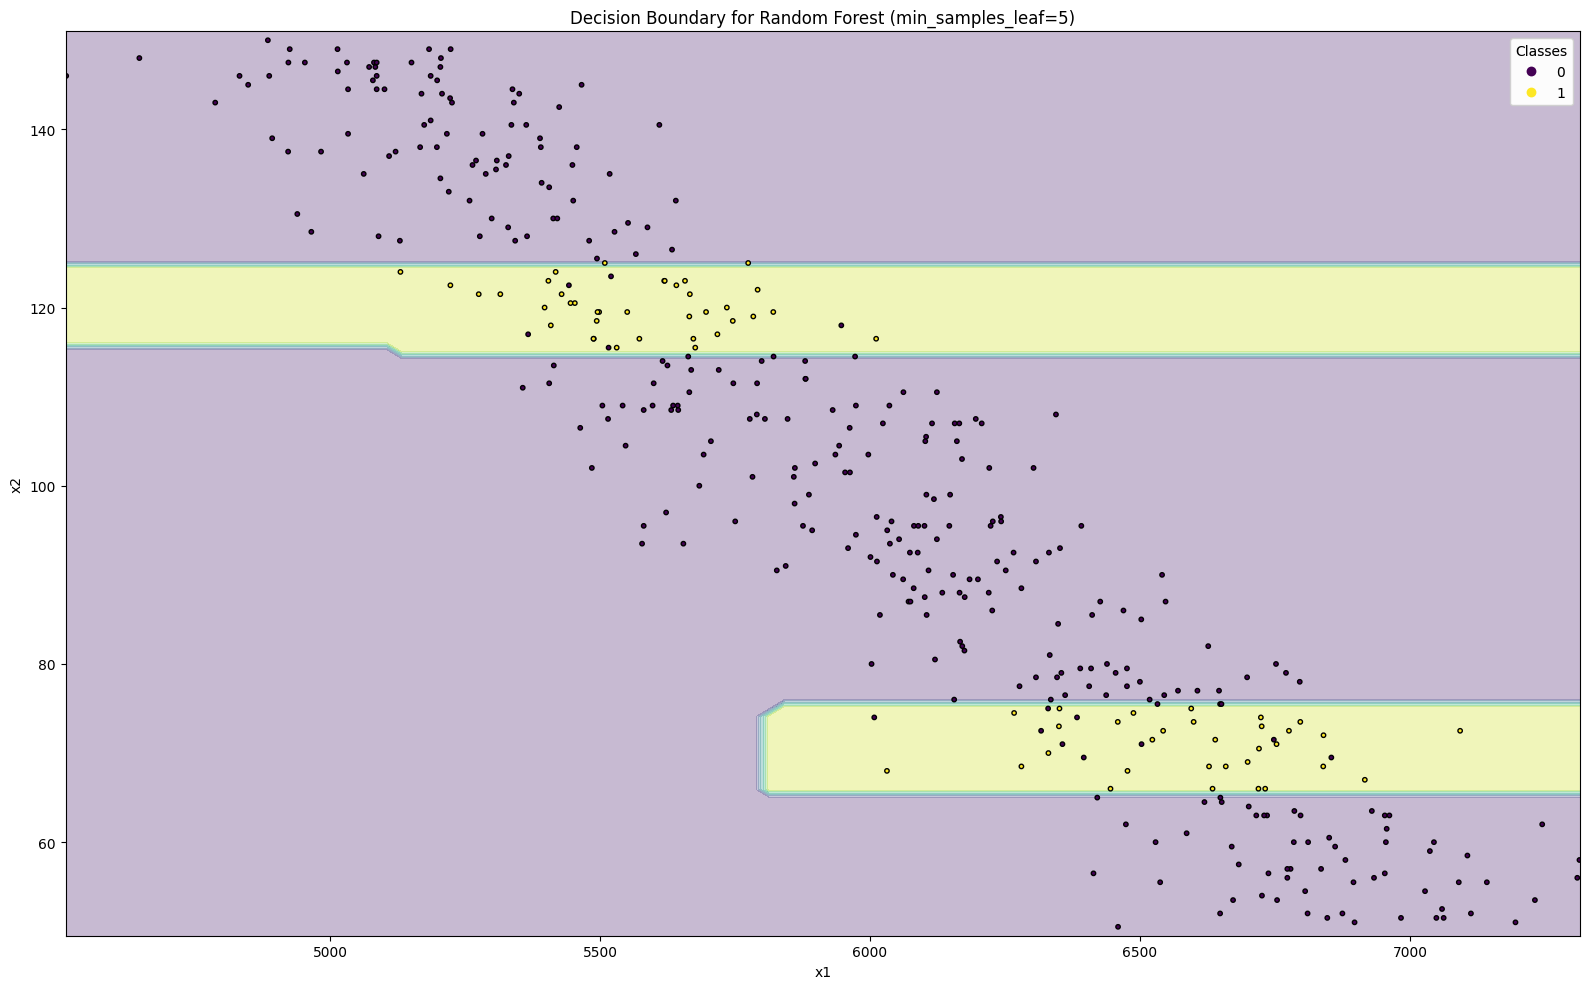

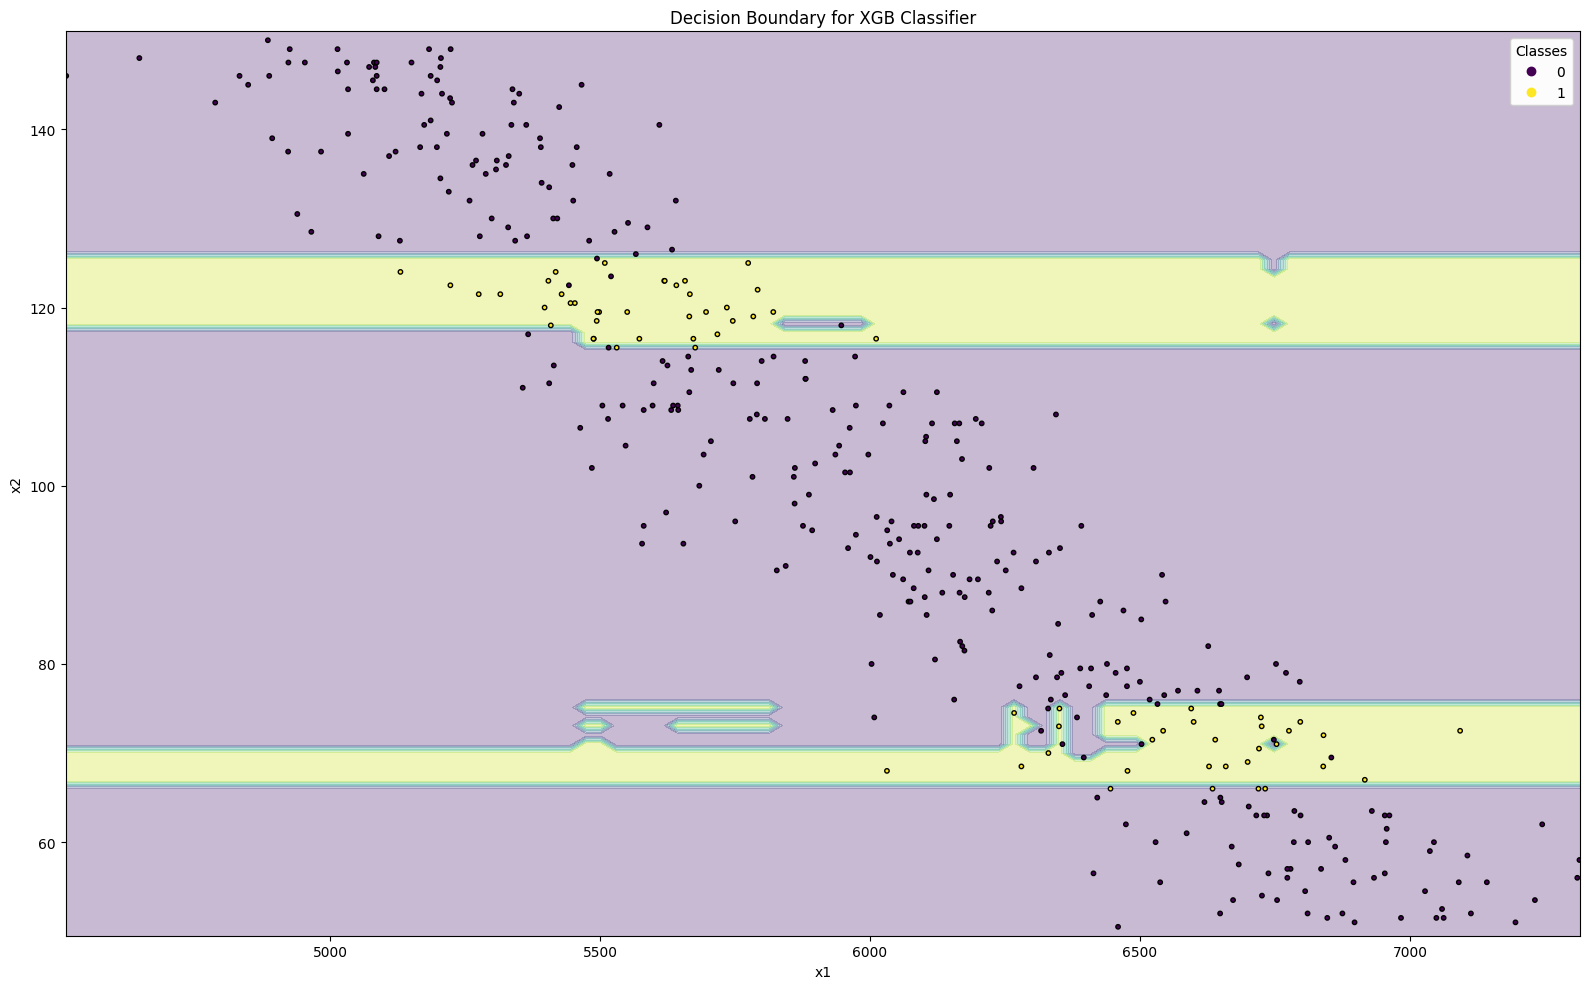

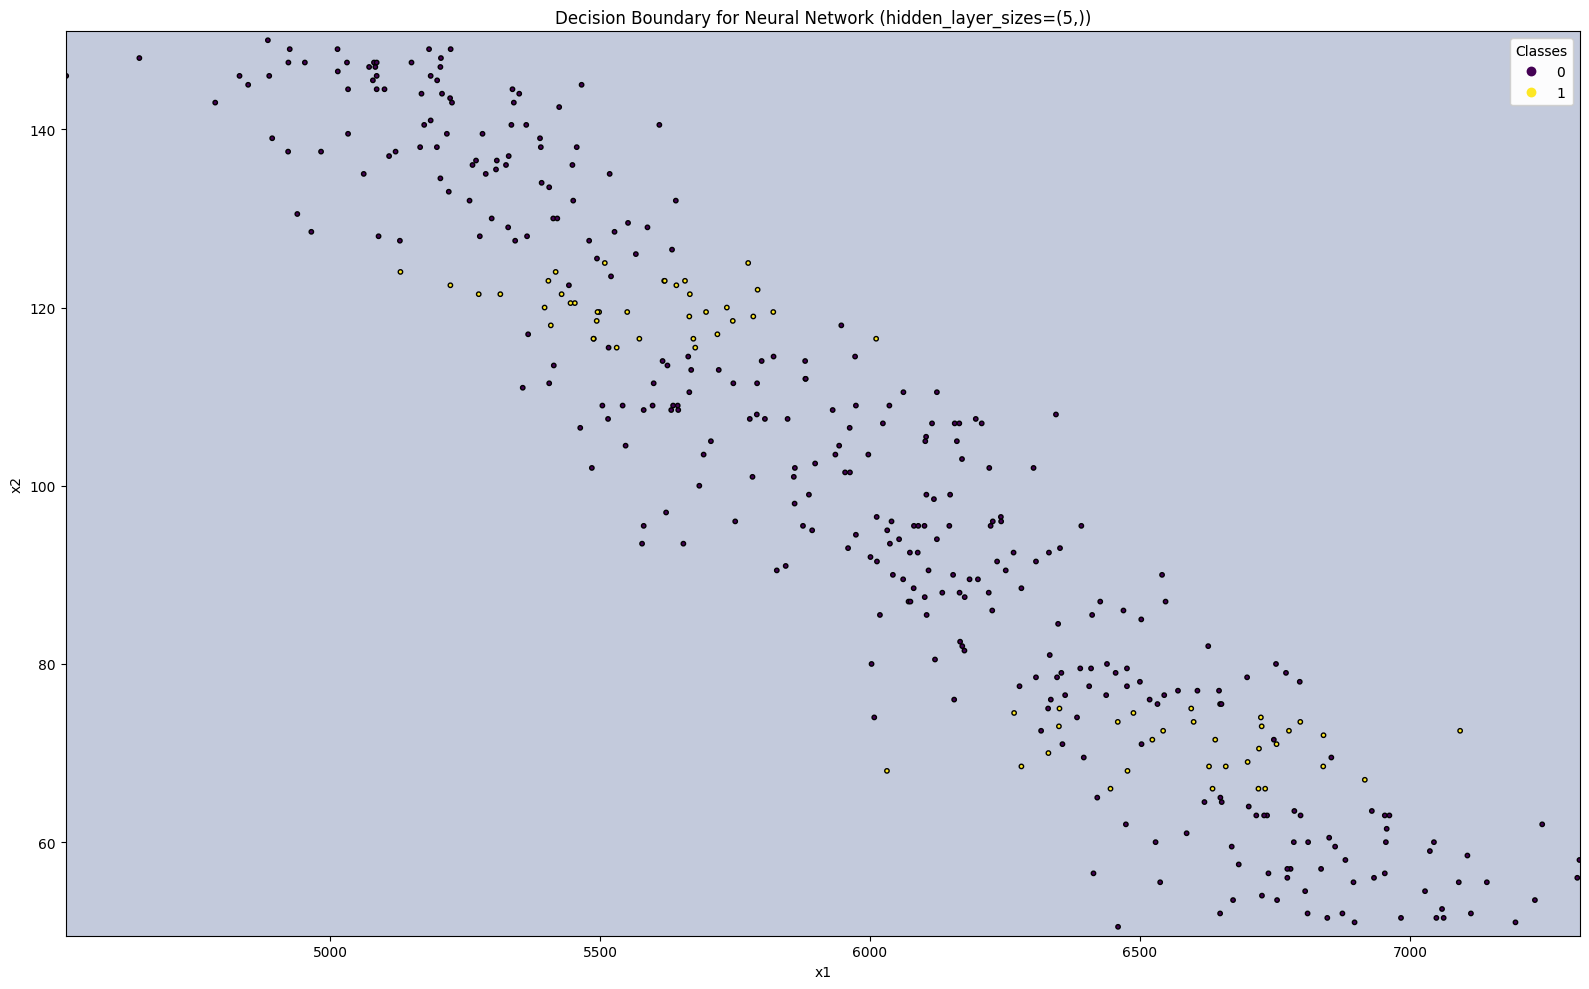

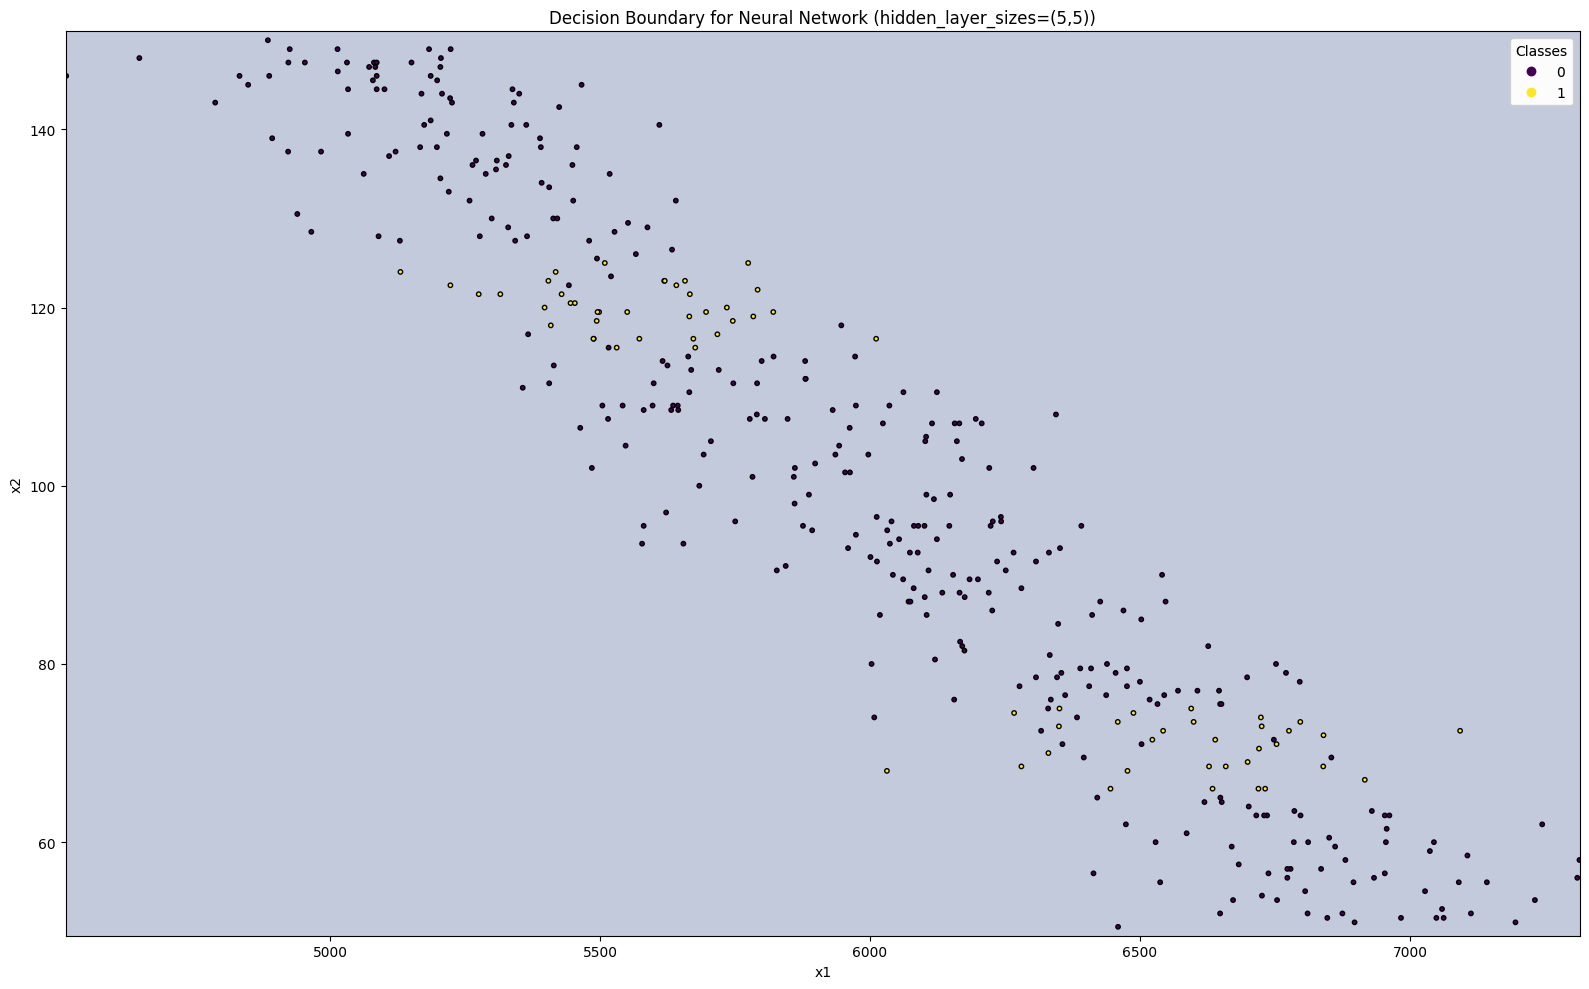

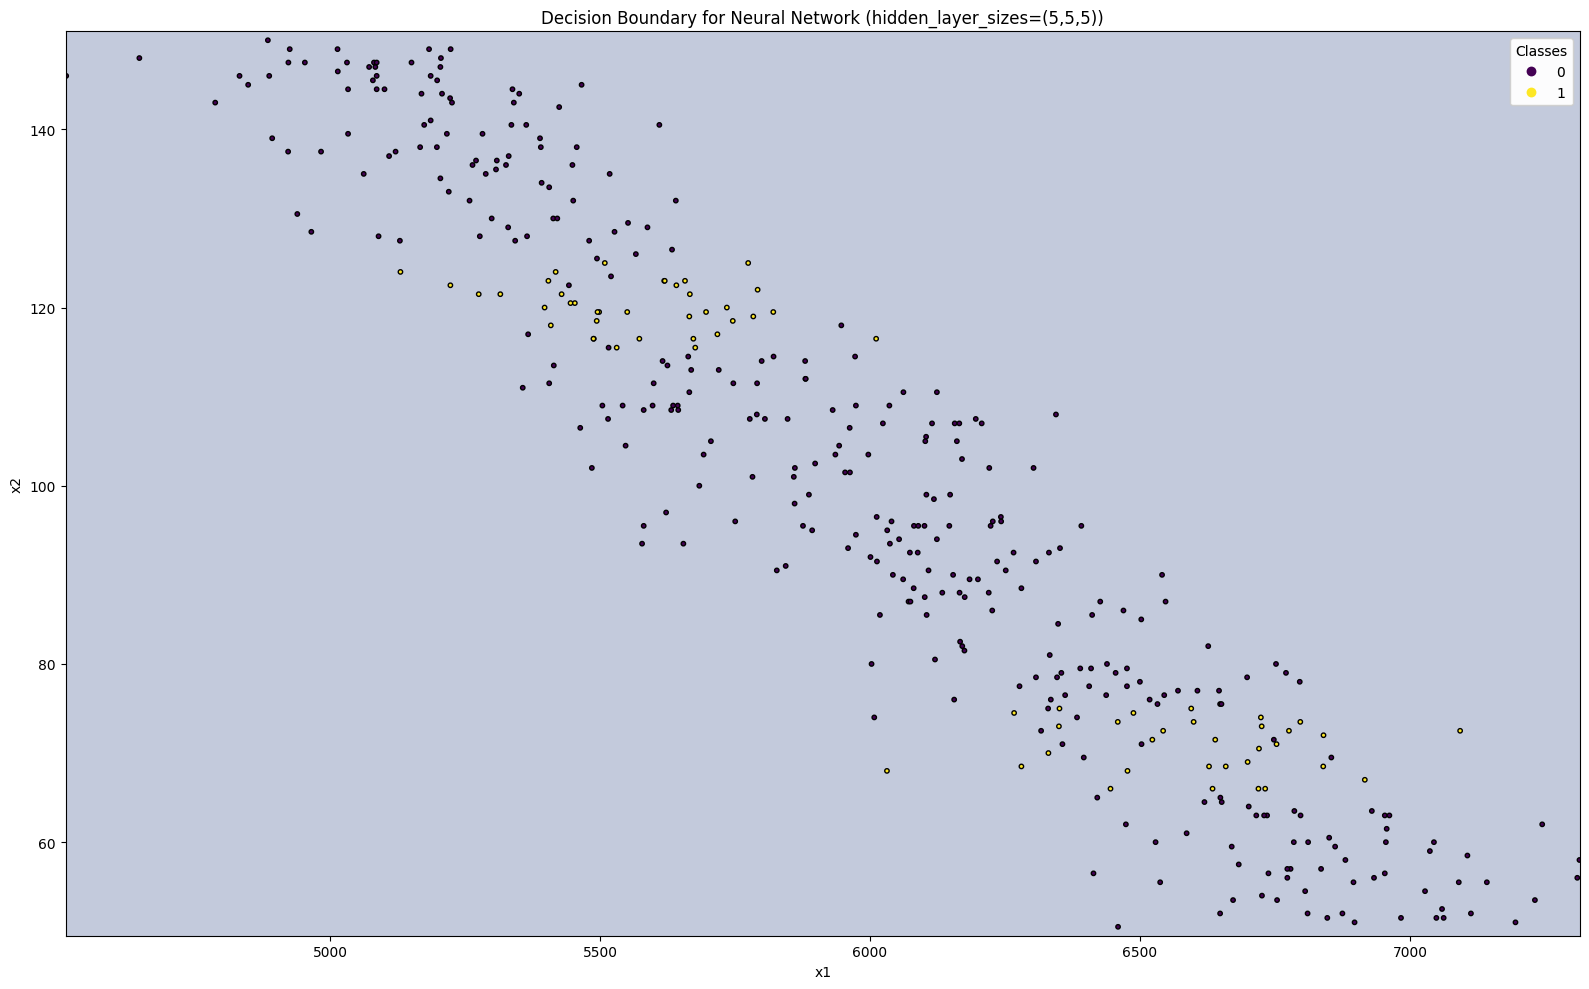

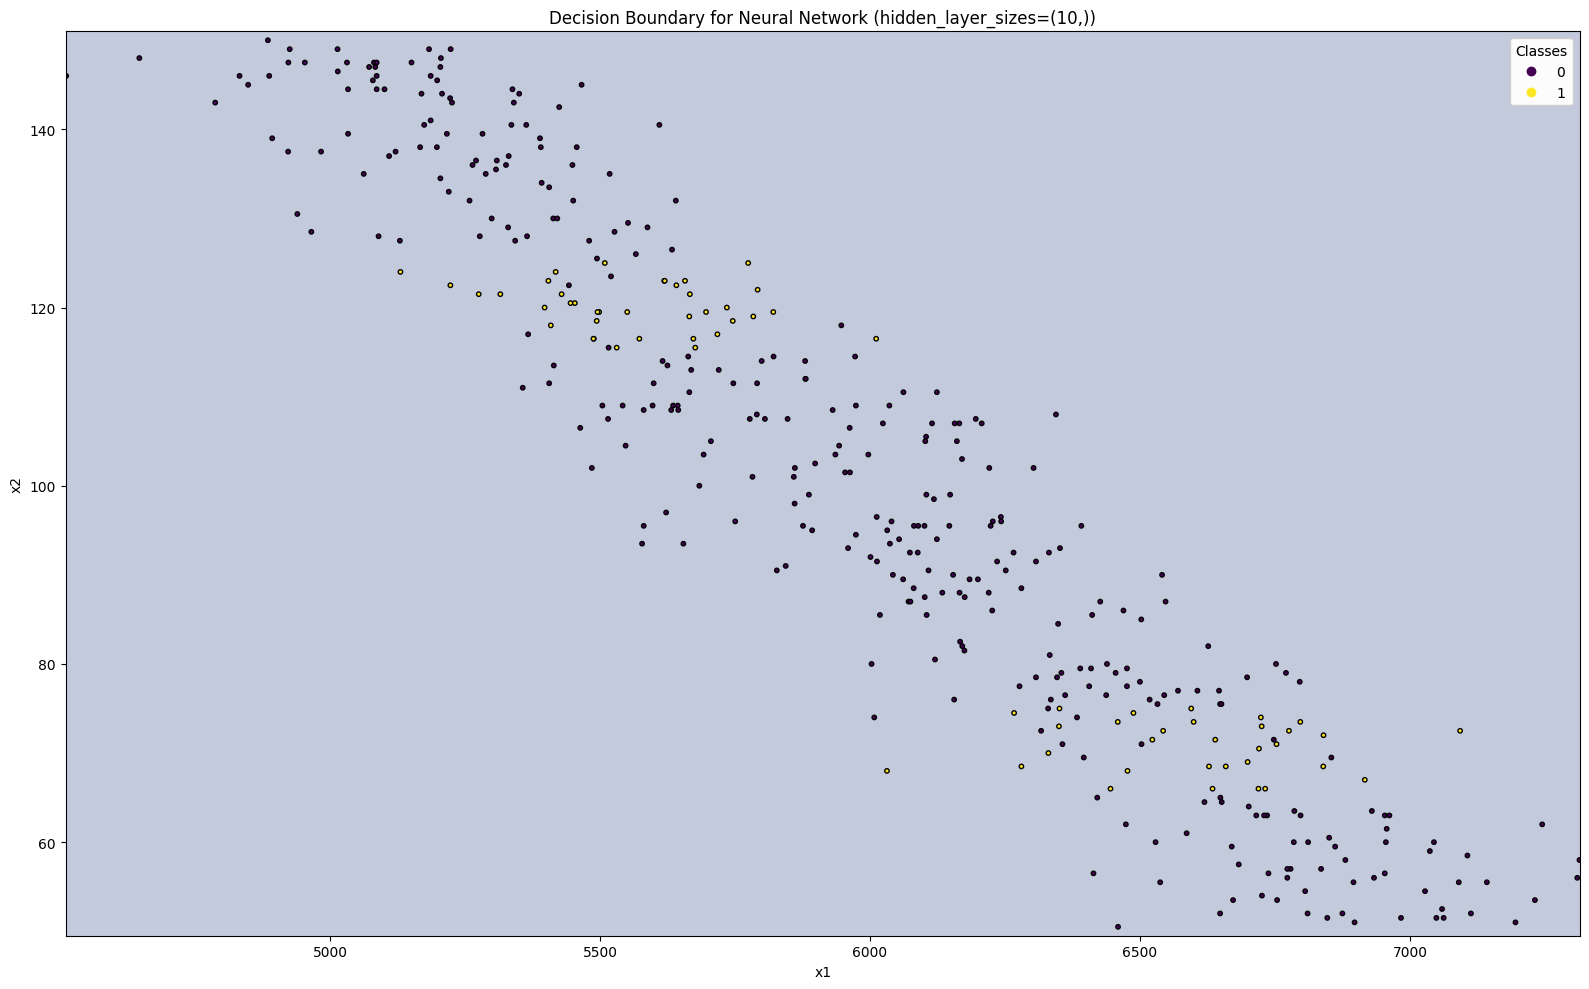

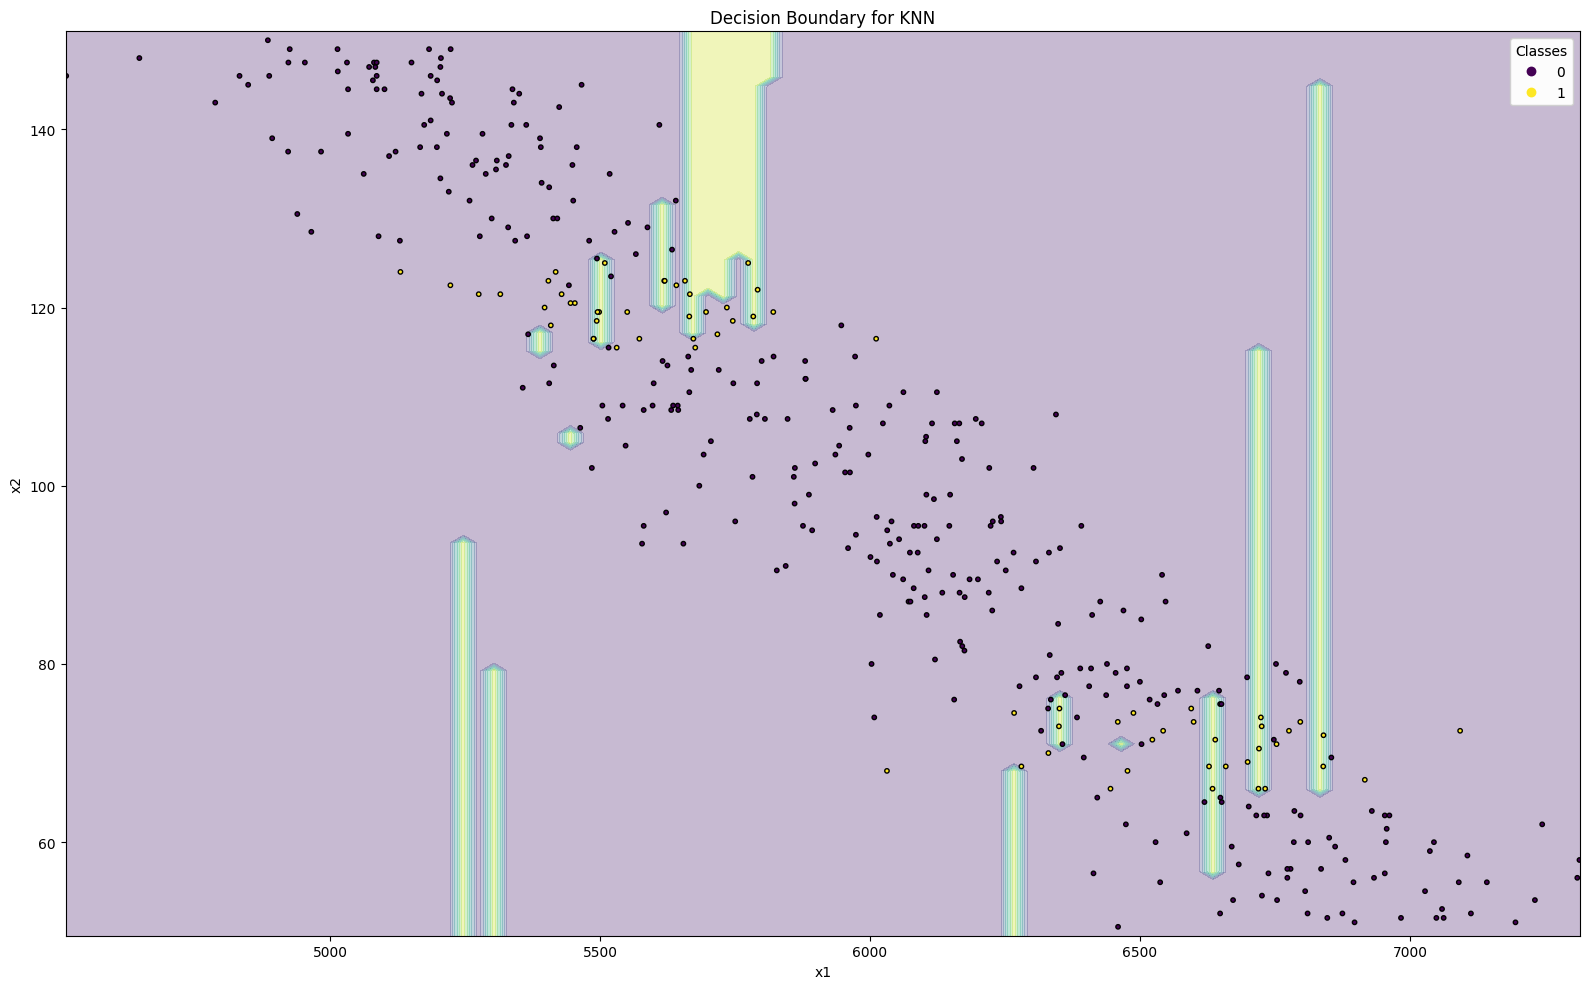

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data_class_a[['Sales', 'SellingPrice']], data_class_a['Returned'], test_size=0.2, random_state=42)

# save metrics to a csv file

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred) # model.score(x_test, y_test)
    print(f"{name} Accuracy: {acc:.2f}, {clf.score(x_test, y_test):.2f}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(16, 10))
    draw_decision_boundary(clf, x_train.values, y_train.values, size=10)
    plt.title(f'Decision Boundary for {name}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.tight_layout()
    plt.savefig(f'decision-boundary-{name}.png', dpi=400)
    # plt.show()

    # save all metrics in csv file
    if not os.path.exists('metrics.csv'):
        with open('metrics.csv', 'w') as f:
            f.write('Model,Accuracy,Precision,Recall,F1,AUC\n')

    with open('metrics.csv', 'a') as f:
        f.write(f"{name},{acc},")
        f.write(','.join([str(x) for x in classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()]))
        f.write(f",{roc_auc_score(y_test, y_pred)}\n")

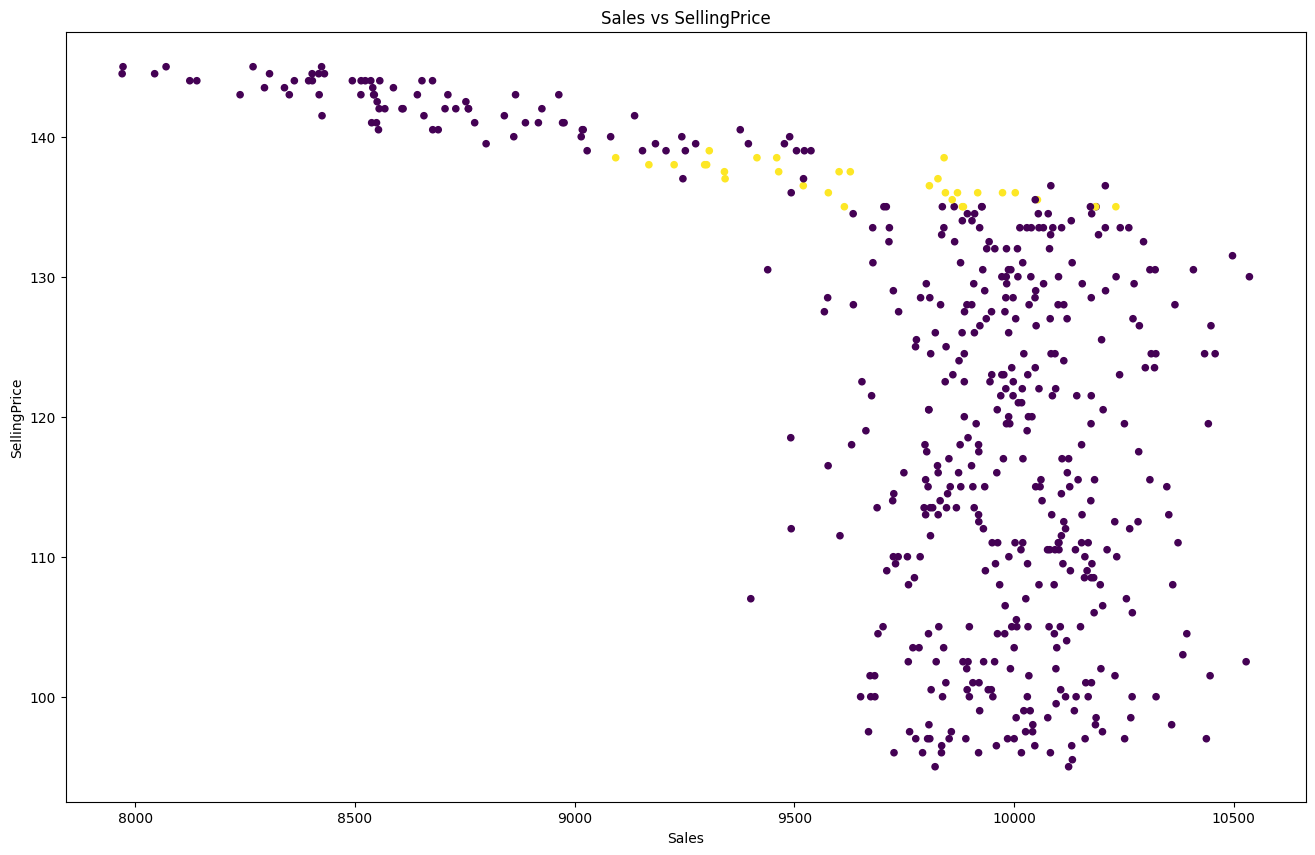

In [8]:
# plot the data
plt.figure(figsize=(16, 10))
plt.scatter(data_class_b['Sales'], data_class_b['SellingPrice'], c=data_class_b['Returned'], cmap='viridis', s=20)
plt.xlabel('Sales')
plt.ylabel('SellingPrice')
plt.title('Sales vs SellingPrice')
plt.show()